In [1]:
import pandas as pd
import os

# Define the folder and file name
folder = 'Datasets'
file_name = '0202-2018-present.csv'
csv_file = os.path.join(folder, file_name)

# Define the columns you want to transform into rows, excluding "SubGrup proced" and "Total"
columns_to_transform = [f"{month}/{year}" for year in range(2018, 2024) for month in ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]]

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file, sep=';', encoding='utf-8')

# Drop the "SubGrup proced" and "Total" columns
df.drop(columns=['SubGrup proced', 'Total'], inplace=True, errors='ignore')

# Melt the DataFrame to convert columns to rows
melted_df = pd.melt(df, var_name='Month/Year', value_name='Value')

# Save the transformed data to a new CSV file
melted_df.to_csv(os.path.join(folder, 'transformed_data.csv'), index=False)


In [2]:
import pandas as pd
import os

# Define the folder and file name for the CSV file
folder = 'Datasets'
file_name_2 = '0202-2012-2017.csv'

# Generate the list of columns to transform using list comprehension
columns_to_transform = [f"{month}/{year}" for year in range(2012, 2018) for month in ["Jan", "Fev", "Mar", "Abr", "Mai", "Jun", "Jul", "Ago", "Set", "Out", "Nov", "Dez"]]

# Read the columns from the CSV file
df2 = pd.read_csv(os.path.join(folder, file_name_2), usecols=columns_to_transform, sep=';', encoding='utf-8')

# Melt the DataFrame to convert columns to rows
melted_df2 = pd.melt(df2, var_name='Month/Year', value_name='Value')

# Save the transformed data to a new CSV file
melted_df2.to_csv(os.path.join(folder, 'transformed_data_2012_2017.csv'), index=False)

In [5]:
import pandas as pd

# Read both CSV files into DataFrames
df_2012_2017 = pd.read_csv('Datasets/transformed_data_2012_2017.csv')
df_2018_2023 = pd.read_csv('Datasets/transformed_data_2018_2023.csv')

# Concatenate the two DataFrames vertically (along rows)
combined_df = pd.concat([df_2012_2017, df_2018_2023], ignore_index=True)

# Remove duplicates based on all columns
combined_df = combined_df.drop_duplicates()

# Save the merged data to a new CSV file as "diagnose_2012_2023.csv"
combined_df.to_csv('Datasets/diagnose_2012_2023.csv', index=False)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Define the folder where "merged_data.csv" is located
folder = 'Datasets'
file_name = 'diagnose_2012_2023.csv'

# Read the merged data into a DataFrame
diagnose = pd.read_csv(os.path.join(folder, file_name))

In [3]:
# Define a mapping from Portuguese to English month abbreviations
month_mapping = {
    'Jan': 'Jan',
    'Fev': 'Feb',
    'Mar': 'Mar',
    'Abr': 'Apr',
    'Mai': 'May',
    'Jun': 'Jun',
    'Jul': 'Jul',
    'Ago': 'Aug',
    'Set': 'Sep',
    'Out': 'Oct',
    'Nov': 'Nov',
    'Dez': 'Dec'
}

# Convert the "Month/Year" column to a datetime format using the custom mapping
diagnose['Month/Year'] = diagnose['Month/Year'].replace(month_mapping, regex=True)
diagnose = diagnose.drop_duplicates(subset=['Month/Year'])
diagnose['Month/Year'] = pd.to_datetime(diagnose['Month/Year'], format='%b/%Y')

# Sort the DataFrame by the "Month/Year" column
diagnose = diagnose.sort_values(by='Month/Year')

In [4]:
# Extract the x (dates) and y (values) values for the line plot
x = diagnose['Month/Year']
y = diagnose['Value']

# Calculate the goal value
goal = 39601
eighty_percent_of_goal = 0.8 * goal

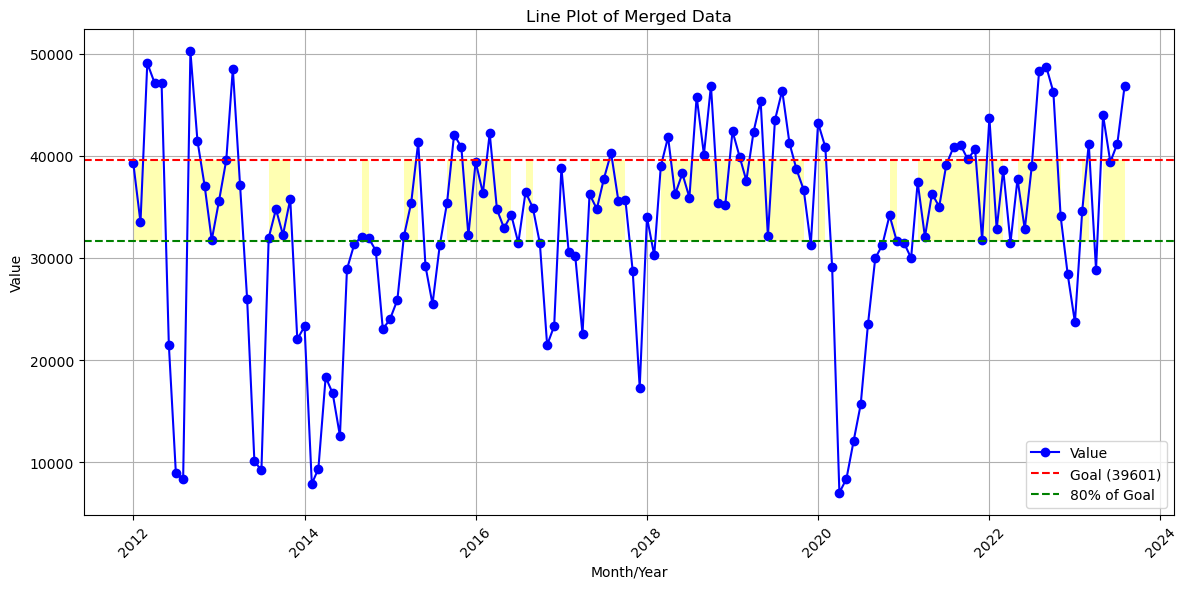

In [5]:
# Create a line plot
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(x, y, marker='o', linestyle='-', color='b', label='Value')
plt.axhline(y=goal, color='r', linestyle='--', label='Goal (39601)')  # Add a red dashed line for the goal
plt.axhline(y=eighty_percent_of_goal, color='g', linestyle='--', label='80% of Goal')  # Add a green dashed line for 80% of the goal
plt.fill_between(x, eighty_percent_of_goal, goal, where=(y >= eighty_percent_of_goal), facecolor='yellow', alpha=0.3)  # Shade the area between the lines
plt.xlabel('Month/Year')
plt.ylabel('Value')
plt.title('Line Plot of Merged Data')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()  # Ensure that labels and titles fit within the plot
plt.show()

In [6]:
# Identify and print months above the goal
months_above_goal = [date.strftime('%b %Y') for date, value in zip(x, y) if value > goal]
print("Months above the goal:")
print(months_above_goal)

# Identify and print months below the shaded area
months_below_area = [date.strftime('%b %Y') for date, value in zip(x, y) if value < eighty_percent_of_goal]
print("Months below area:")
print(months_below_area)

Months above the goal:
['Mar 2012', 'Apr 2012', 'May 2012', 'Sep 2012', 'Oct 2012', 'Mar 2013', 'May 2015', 'Oct 2015', 'Nov 2015', 'Mar 2016', 'Aug 2017', 'Apr 2018', 'Aug 2018', 'Sep 2018', 'Oct 2018', 'Jan 2019', 'Feb 2019', 'Apr 2019', 'May 2019', 'Jul 2019', 'Aug 2019', 'Sep 2019', 'Jan 2020', 'Feb 2020', 'Aug 2021', 'Sep 2021', 'Oct 2021', 'Nov 2021', 'Jan 2022', 'Aug 2022', 'Sep 2022', 'Oct 2022', 'Mar 2023', 'May 2023', 'Jul 2023', 'Aug 2023']
Months below area:
['Jun 2012', 'Jul 2012', 'Aug 2012', 'May 2013', 'Jun 2013', 'Jul 2013', 'Dec 2013', 'Jan 2014', 'Feb 2014', 'Mar 2014', 'Apr 2014', 'May 2014', 'Jun 2014', 'Jul 2014', 'Aug 2014', 'Nov 2014', 'Dec 2014', 'Jan 2015', 'Feb 2015', 'Jun 2015', 'Jul 2015', 'Aug 2015', 'Jul 2016', 'Oct 2016', 'Nov 2016', 'Dec 2016', 'Feb 2017', 'Mar 2017', 'Apr 2017', 'Nov 2017', 'Dec 2017', 'Feb 2018', 'Dec 2019', 'Mar 2020', 'Apr 2020', 'May 2020', 'Jun 2020', 'Jul 2020', 'Aug 2020', 'Sep 2020', 'Oct 2020', 'Jan 2021', 'Feb 2021', 'Apr 202

In [7]:
import seaborn as sns
sns.set_palette('Accent')
sns.set_style('darkgrid')

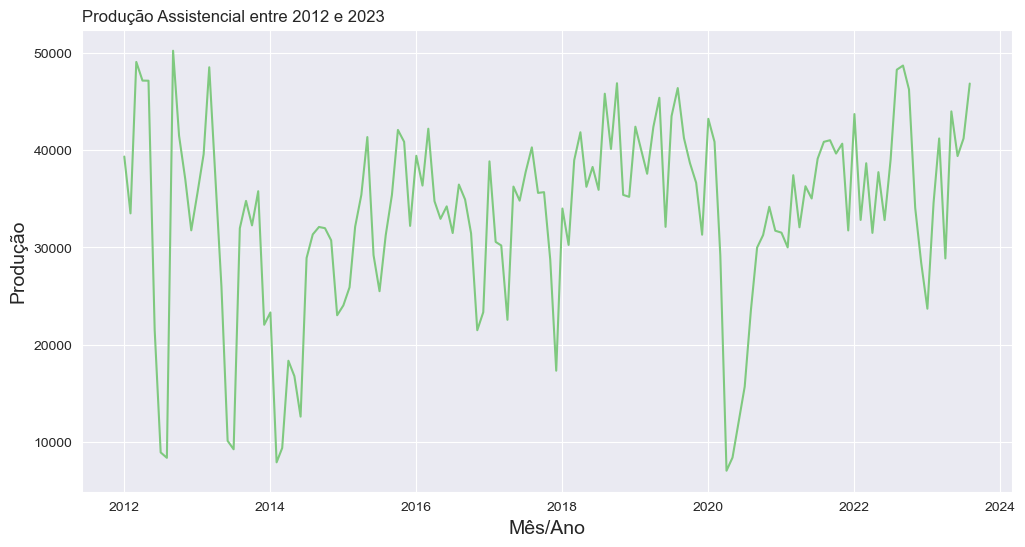

In [8]:
ax = sns.lineplot(x='Month/Year', y="Value", data=diagnose)
ax.figure.set_size_inches(12, 6)
ax.set_title("Produção Assistencial entre 2012 e 2023", loc="left")
ax.set_xlabel("Mês/Ano", fontsize=14)
ax.set_ylabel("Produção", fontsize=14)
ax = ax


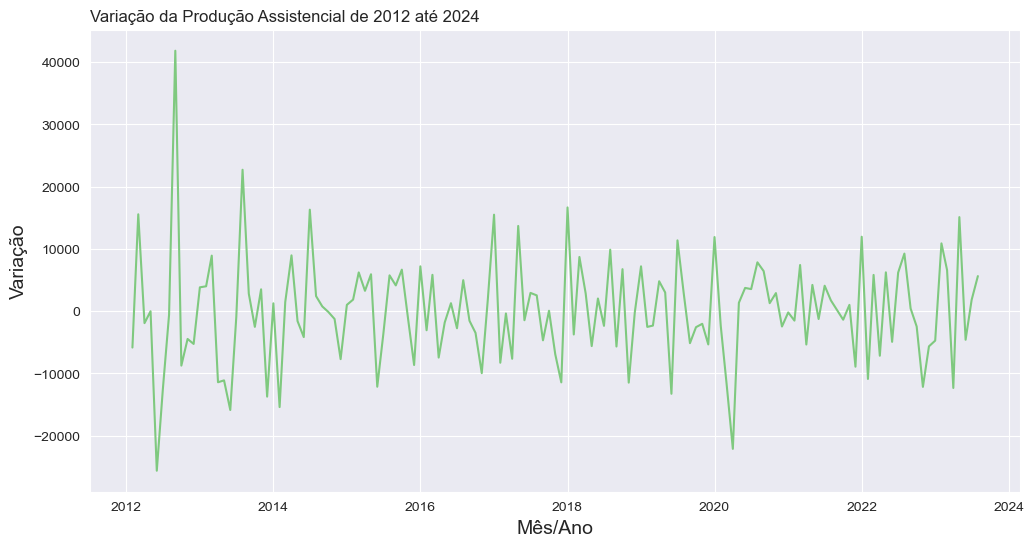

In [9]:
# Difference between months and years
diagnose['Progression'] = diagnose['Value'].diff()

#Plot
ax = sns.lineplot(x='Month/Year', y="Progression", data=diagnose)
ax.figure.set_size_inches(12, 6)
ax.set_title("Variação da Produção Assistencial de 2012 até 2024", loc="left")
ax.set_xlabel("Mês/Ano", fontsize=14)
ax.set_ylabel("Variação", fontsize=14)
ax = ax

In [10]:
from pandas import DataFrame
def graph_plot(titulo: str, 
               labelx: str, 
               labely: str, 
               x: str, 
               y: str, 
               dataset: DataFrame):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

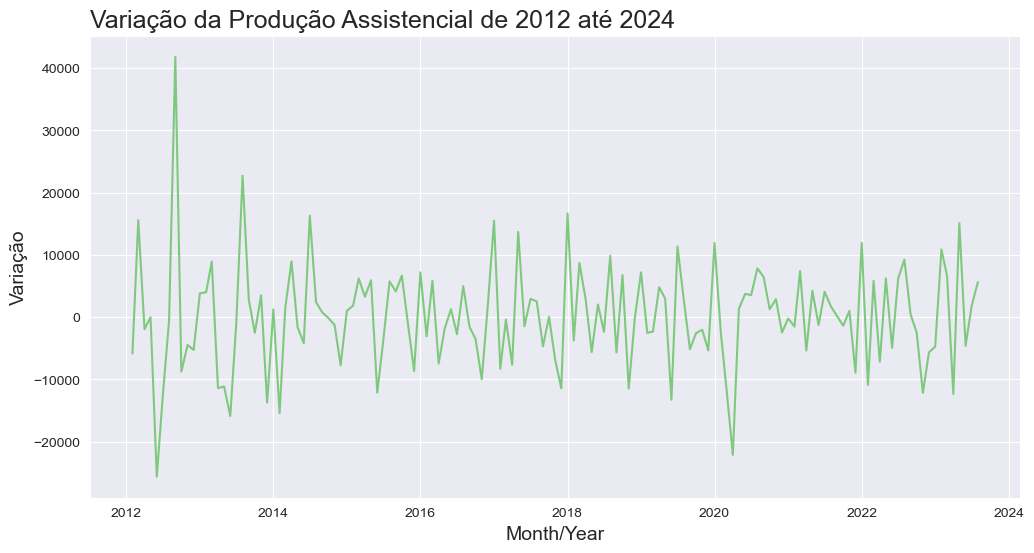

In [12]:
graph_plot("Variação da Produção Assistencial de 2012 até 2024", "Month/Year","Variação", "Month/Year", "Progression", diagnose)

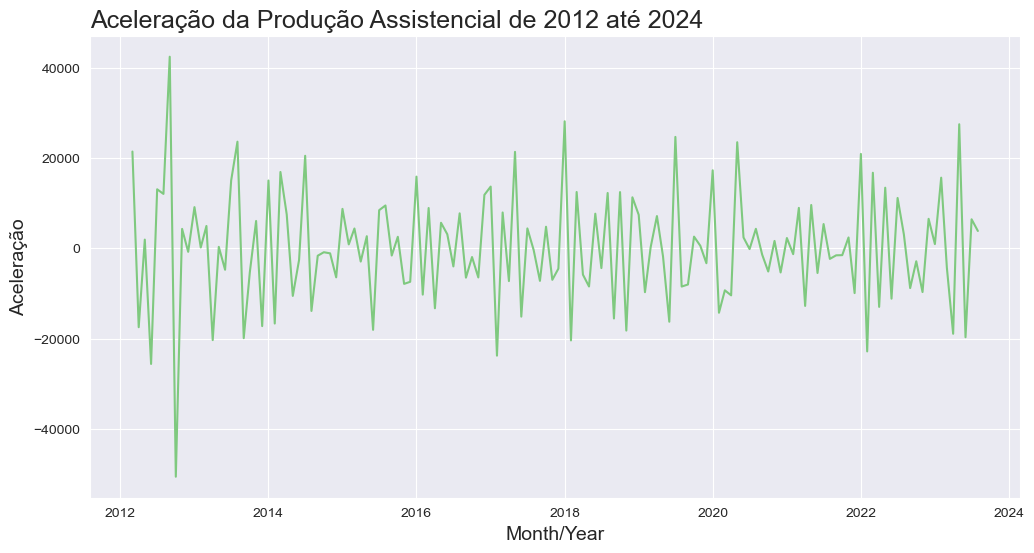

In [14]:
# Aceleração da variação de valores

diagnose["aceleracao"] = diagnose["Progression"].diff()
graph_plot("Aceleração da Produção Assistencial de 2012 até 2024", "Month/Year","Aceleração", "Month/Year", "aceleracao", diagnose)

In [15]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax=ax

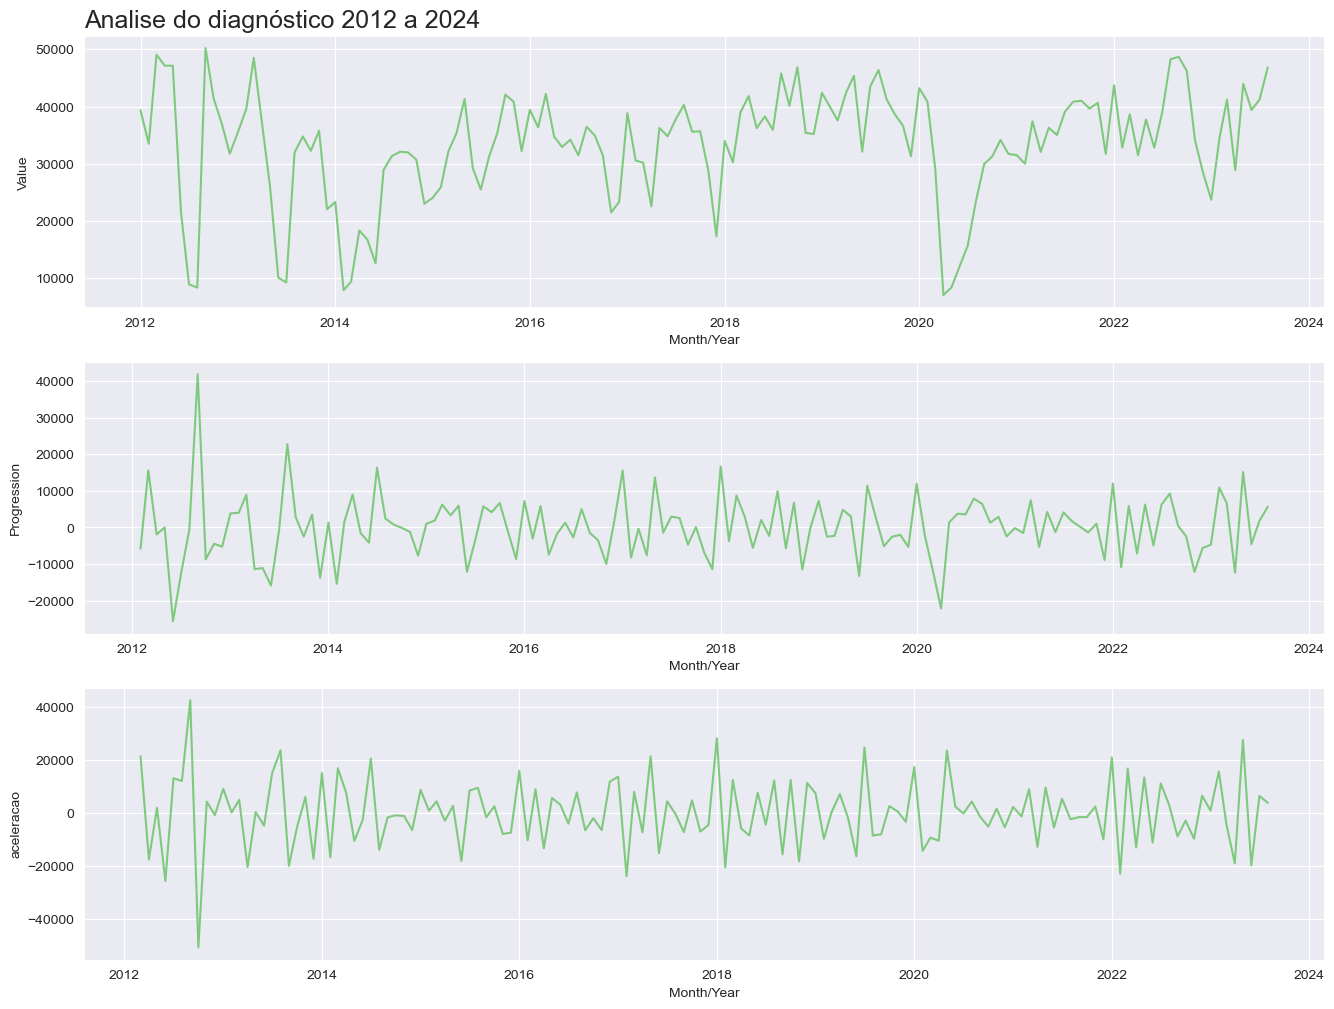

In [16]:
plot_comparacao('Month/Year', "Value", "Progression", "aceleracao", diagnose, "Analise do diagnóstico 2012 a 2024")

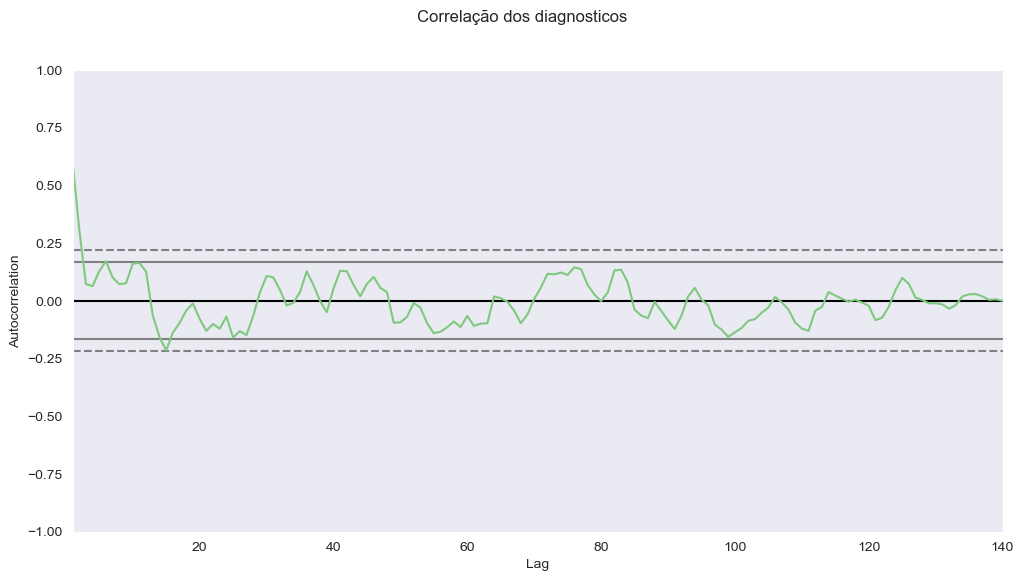

In [17]:
from pandas.plotting import autocorrelation_plot


ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação dos diagnosticos') 
autocorrelation_plot(diagnose["Value"])
ax=ax

# Agrupando por mês